In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [14]:
!pip install ipympl --user
!pip install ipywidgets --user

     |████████████████████████████████| 463 kB 595 kB/s eta 0:00:01


In [15]:
!jupyter nbextensions enable --py --sys--prefix widgetsnbextension
!jupyter nbextensions install --py --symlink --sys--prefix ipympl

Traceback (most recent call last):
  File "/Users/kritik/opt/anaconda3/bin/jupyter", line 11, in <module>
    sys.exit(main())
  File "/Users/kritik/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/command.py", line 247, in main
    command = _jupyter_abspath(subcommand)
  File "/Users/kritik/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/command.py", line 134, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Jupyter command `jupyter-nbextensions` not found.
Traceback (most recent call last):
  File "/Users/kritik/opt/anaconda3/bin/jupyter", line 11, in <module>
    sys.exit(main())
  File "/Users/kritik/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/command.py", line 247, in main
    command = _jupyter_abspath(subcommand)
  File "/Users/kritik/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/command.py", line 134, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Ju

In [9]:
#Data generation
rng = np.random.RandomState(1)
X = 10 * rng.rand(200)
y = 2 * X - 5 + rng.randn(200)

(-8.476660143215415, 17.08895915194328)

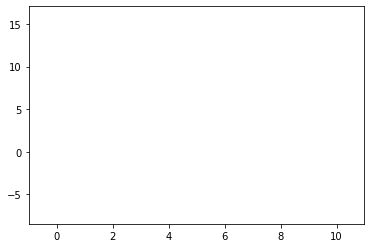

In [10]:
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(X.min()-1,X.max()+1)
ax.set_ylim(y.min()-1,y.max()+1)

In [11]:
plt.show(block=False)

In [12]:
#cost function using root mean square
def cost_fun_rmse(X,y,B1,B0):
    y_pred = X*B1 + B0
    return np.sum(np.square(y-y_pred))/X.shape[0]

#Gradient descent
def gradient_descent(X,y,alpha,B1,B0):
    y_pred = X*B1 + B0
    y_diff = (y - y_pred)
    t_B1 = -2*(np.sum(y_diff*X)/X.shape[0])
    t_B0 = -2*(np.sum(y_diff)/X.shape[0])
    B1 = B1 - alpha*t_B1
    B0 = B0 - alpha*t_B0
    return (B1, B0)

In [13]:
B1 = 1     #slope
B0 = 1     #interscept
alpha = 0.005
iter_num = 1000   # number of iterations
x_vals = np.arange(ax.get_xlim()[0],ax.get_xlim()[1],0.01)
ax.scatter(X,y,s=2)
ax.set_title('Linear Regression with Gradient Descent', fontsize = 14)
for i in range(iter_num):
    ax.legend(['      Slope B1:= '+ str(round(B1,4)) + '\n' +'Intercept B0:= ' + str(round(B0,4)) ])
    B1, B0 = gradient_descent(X,y,alpha,B1,B0)
    y_vals = x_vals*B1 + B0
    plt_obj = ax.scatter(x_vals,y_vals,marker = 'x',c = 'C1',s = 1)
    #time.sleep(0.01)
    fig.canvas.draw()
    fig.canvas.flush_events()
    if i != iter_num -1:
        plt_obj.remove()
plt.close(fig)